

```
# This is formatted as code
```

# CMPS 320 Final Project Code

### 12/15/2023

### Kamila Palys, Tina Nosrati, Jenna Vesey, Tiffany LaTorre

## **Introduction and Problem Definition:**

The primary objective of this project is to build a predictive model that can identify students' stress levels and determine the primary factors contributing to increased stress. By analyzing various factors, the model aims to identify potential mental health issues and support students needing stress management. The project's ultimate goal is to understand the significance of individual variables in determining stress levels, which can help prevent future mental health issues and develop new strategies to support students' mental well-being. The comprehensive dataset used in this project provides valuable insights for developing strategies to support students' mental health and well-being.

Dataset: https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/data

In [ ]:
# Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from pandas.api.types import CategoricalDtype


In [ ]:
# Loading the dataset
from google.colab import drive

drive.mount('/content/drive')

stress = pd.read_csv('/content/drive/MyDrive/CMPS320_project/Datasets/stress.csv')
stress.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


## **Data Exploration:**

In [ ]:
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   anxiety_level                 1100 non-null   category
 1   self_esteem                   1100 non-null   category
 2   mental_health_history         1100 non-null   category
 3   depression                    1100 non-null   category
 4   headache                      1100 non-null   category
 5   blood_pressure                1100 non-null   category
 6   sleep_quality                 1100 non-null   category
 7   breathing_problem             1100 non-null   category
 8   noise_level                   1100 non-null   category
 9   living_conditions             1100 non-null   category
 10  safety                        1100 non-null   category
 11  basic_needs                   1100 non-null   category
 12  academic_performance          1100 non-null   ca

In [ ]:
# change all variables to be of categorical type instead of numerical
stress = stress.iloc[:, :].astype("category")

0    373
2    369
1    358
Name: stress_level, dtype: int64


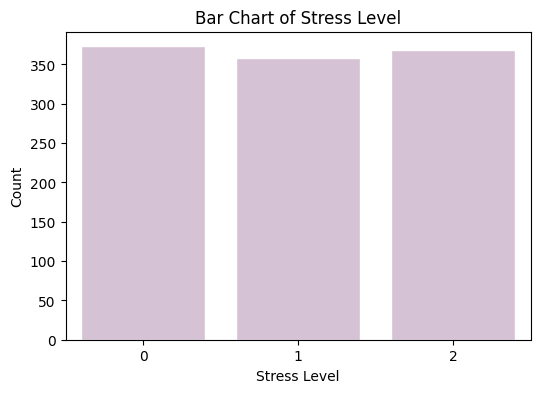

In [ ]:
# Target Variable
print(stress['stress_level'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(stress, x='stress_level', color='thistle', edgecolor='white')
plt.title('Bar Chart of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel("Count")
plt.show()


In [ ]:
environmental_factors = stress[['noise_level', 'living_conditions', 'safety', 'basic_needs']]
academic_factors = stress[['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']]
social_factor = stress[['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']]
psychological_factors = stress[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']]
physiological_factors = stress[['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']]

In [ ]:
def visualize_factors(factors,color):
  plt.figure(figsize=(15,12))
  for i, column in enumerate(factors.columns, 1):
    column_name = ""
    for word in column.split('_'):
      column_name = column_name + word.capitalize() + " "
    plt.subplot(2, 2, i)
    a=plt.gca()
    sns.countplot(factors, x=column, color=color, edgecolor='white')
    plt.title(f'Bar Chart of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel("Count")
    a.title.set_size(20)

  plt.tight_layout()
  plt.show()


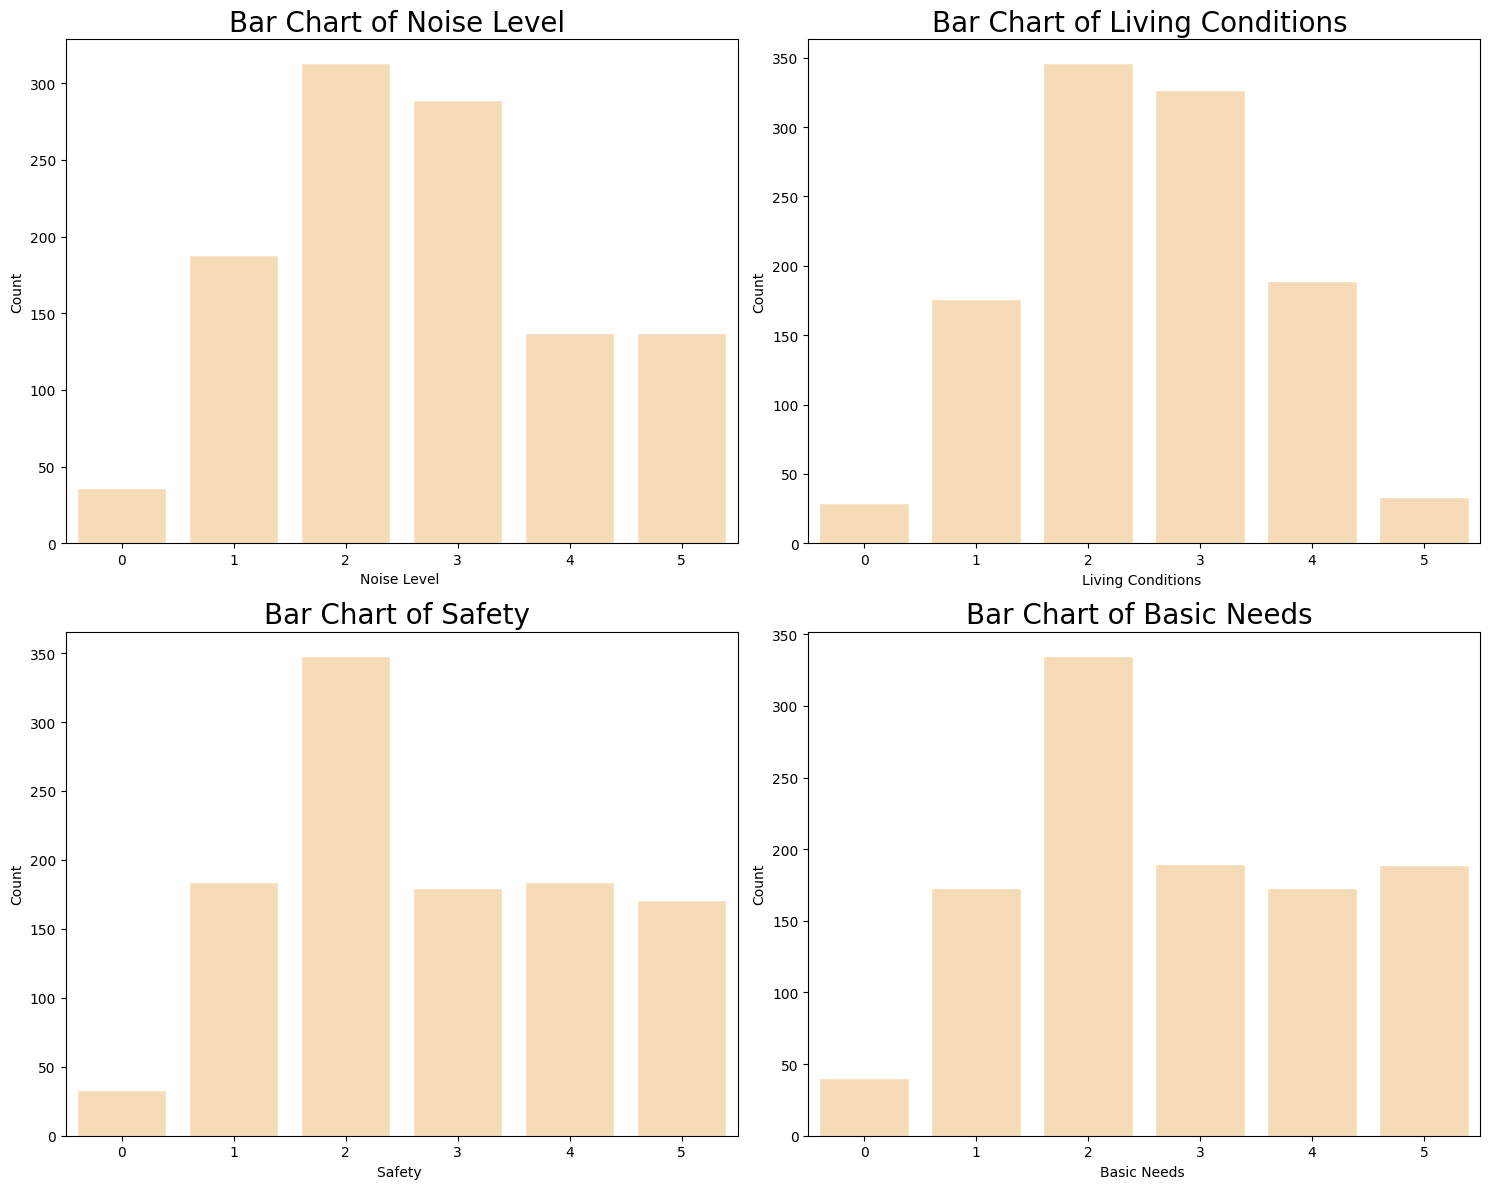

In [ ]:
visualize_factors(environmental_factors,'navajowhite')

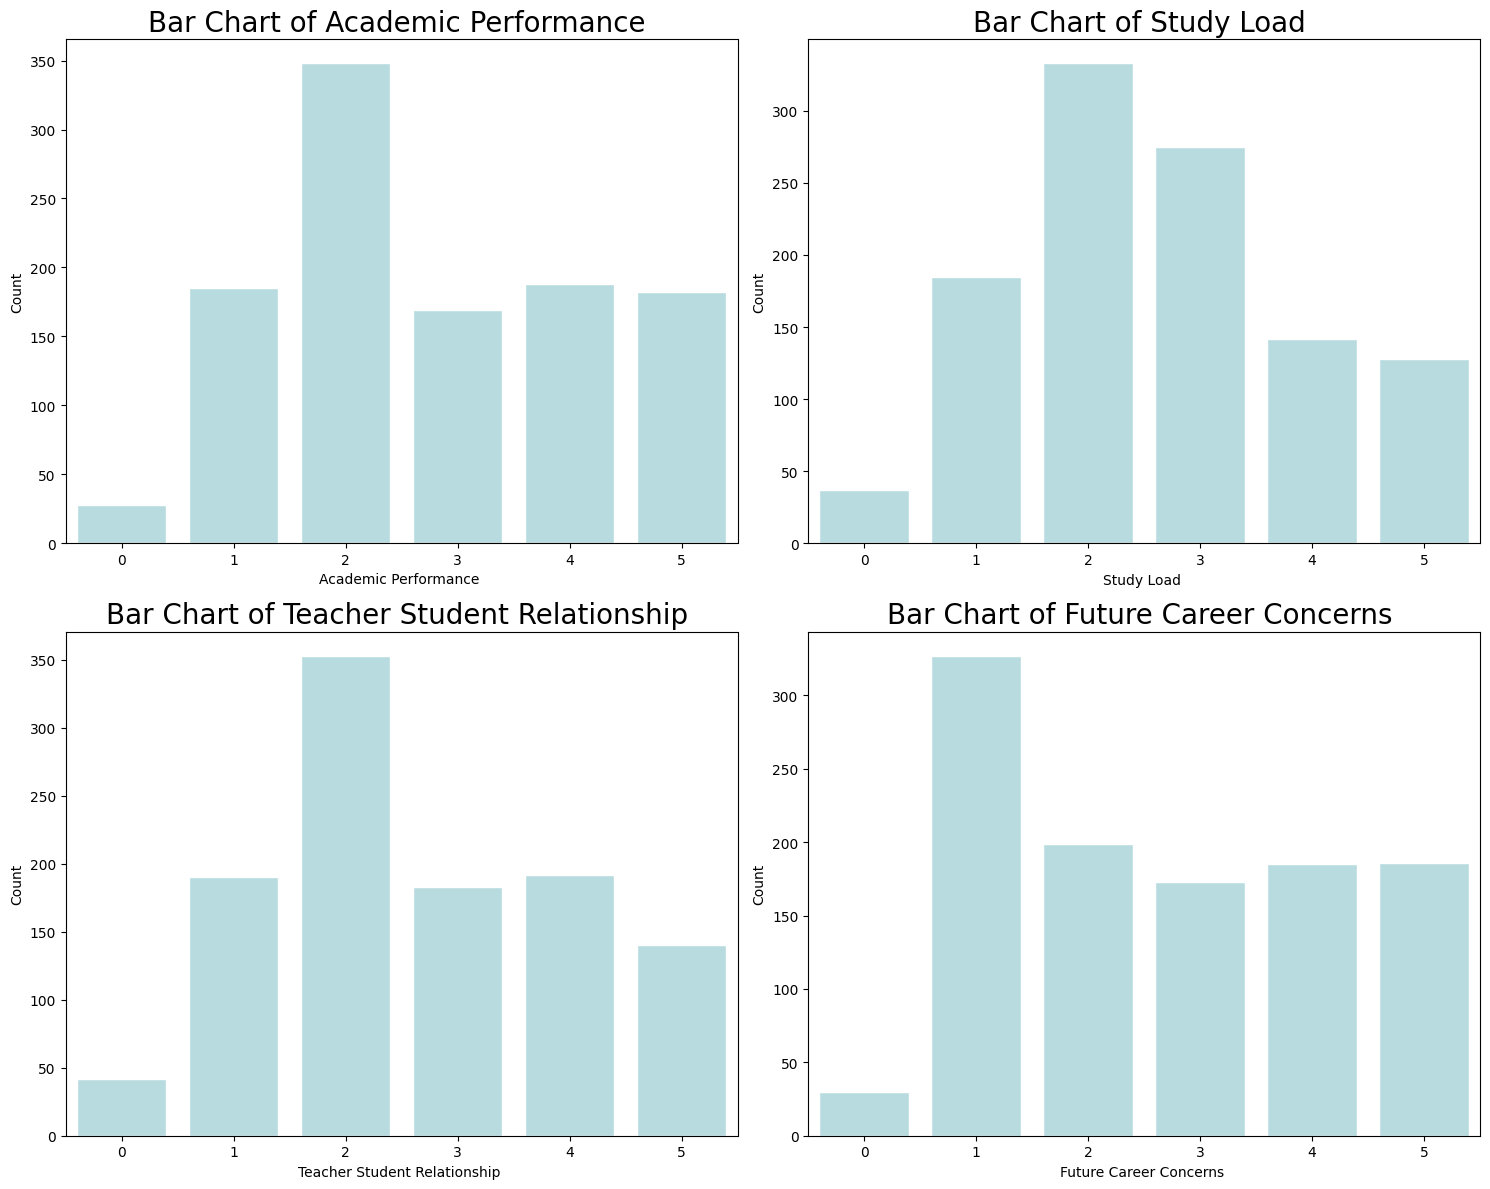

In [ ]:
visualize_factors(academic_factors,'powderblue')

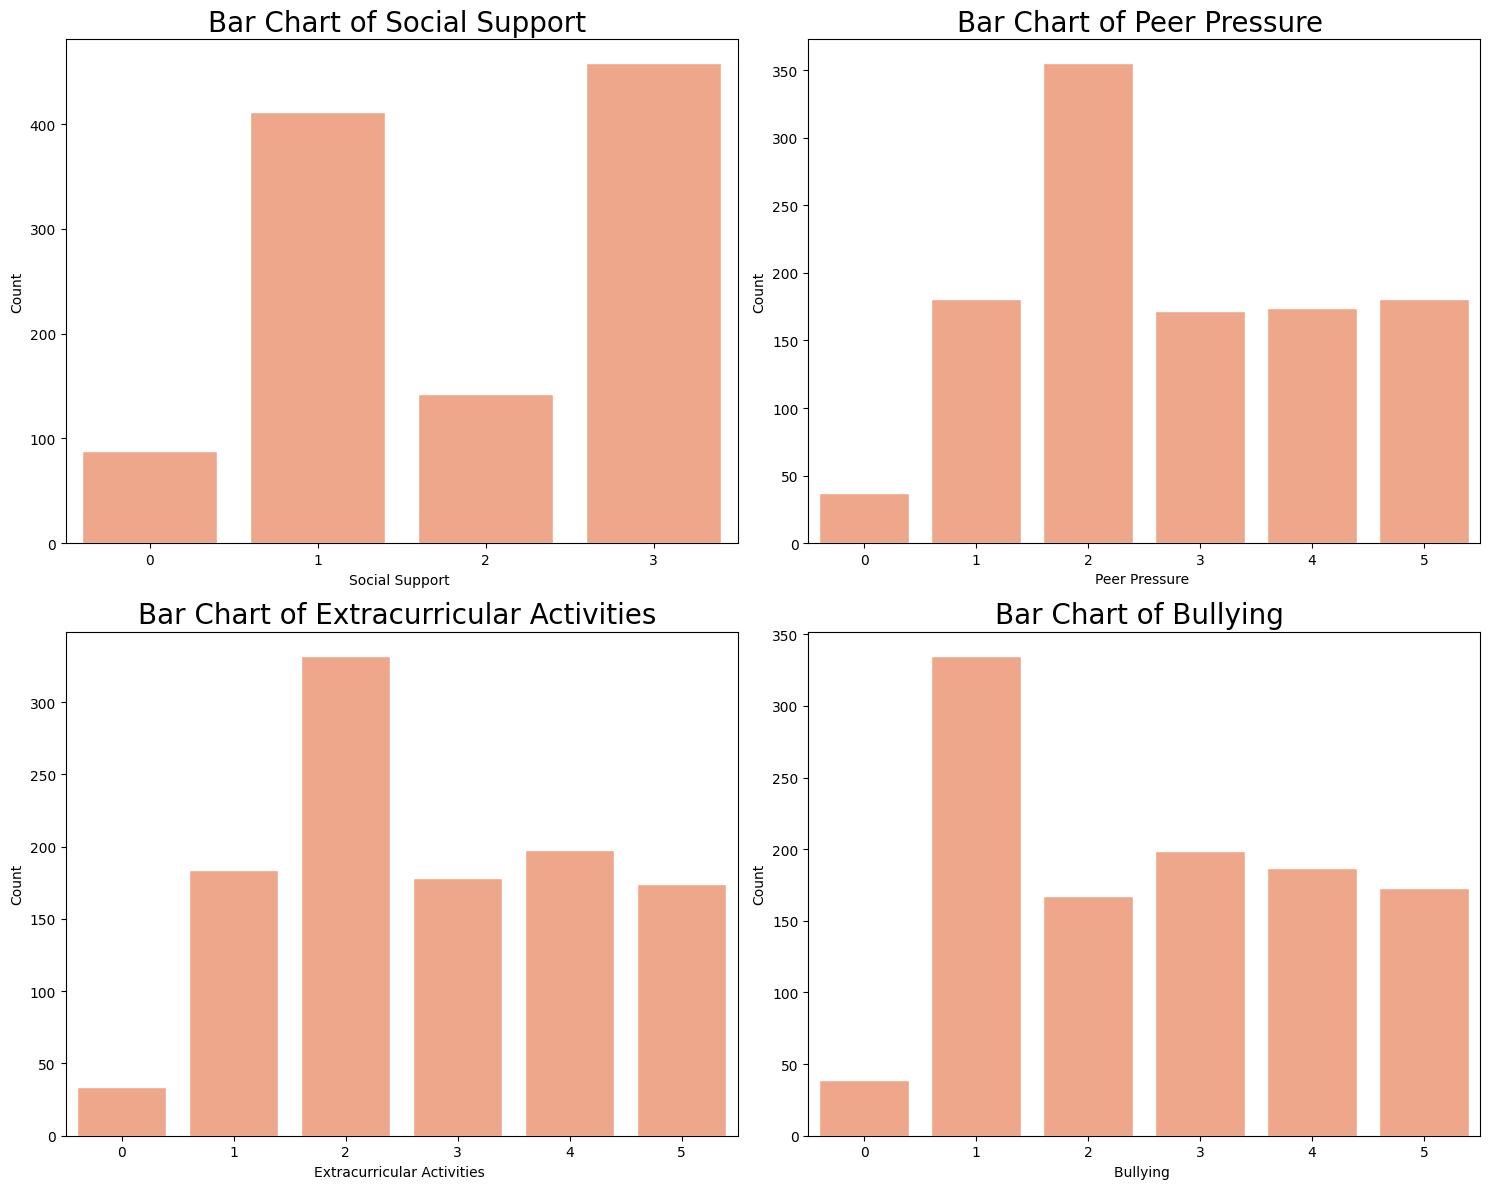

In [ ]:
visualize_factors(social_factor,'lightsalmon')

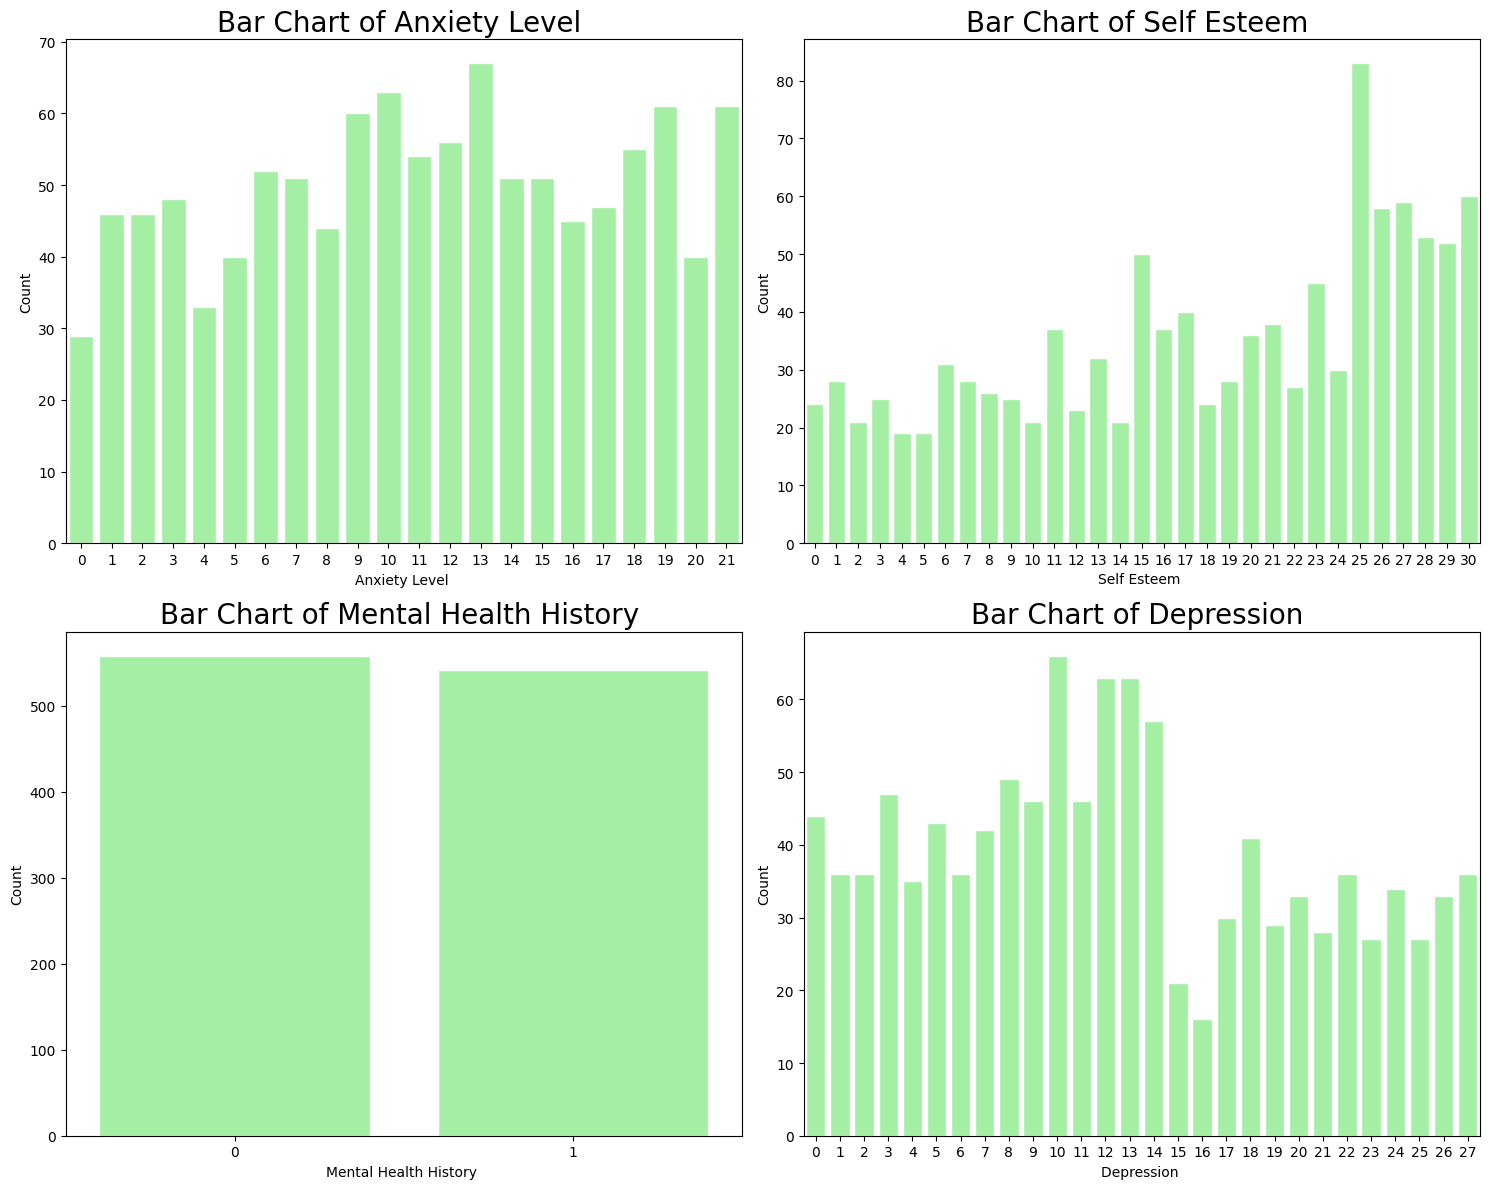

In [ ]:
visualize_factors(psychological_factors,'palegreen')

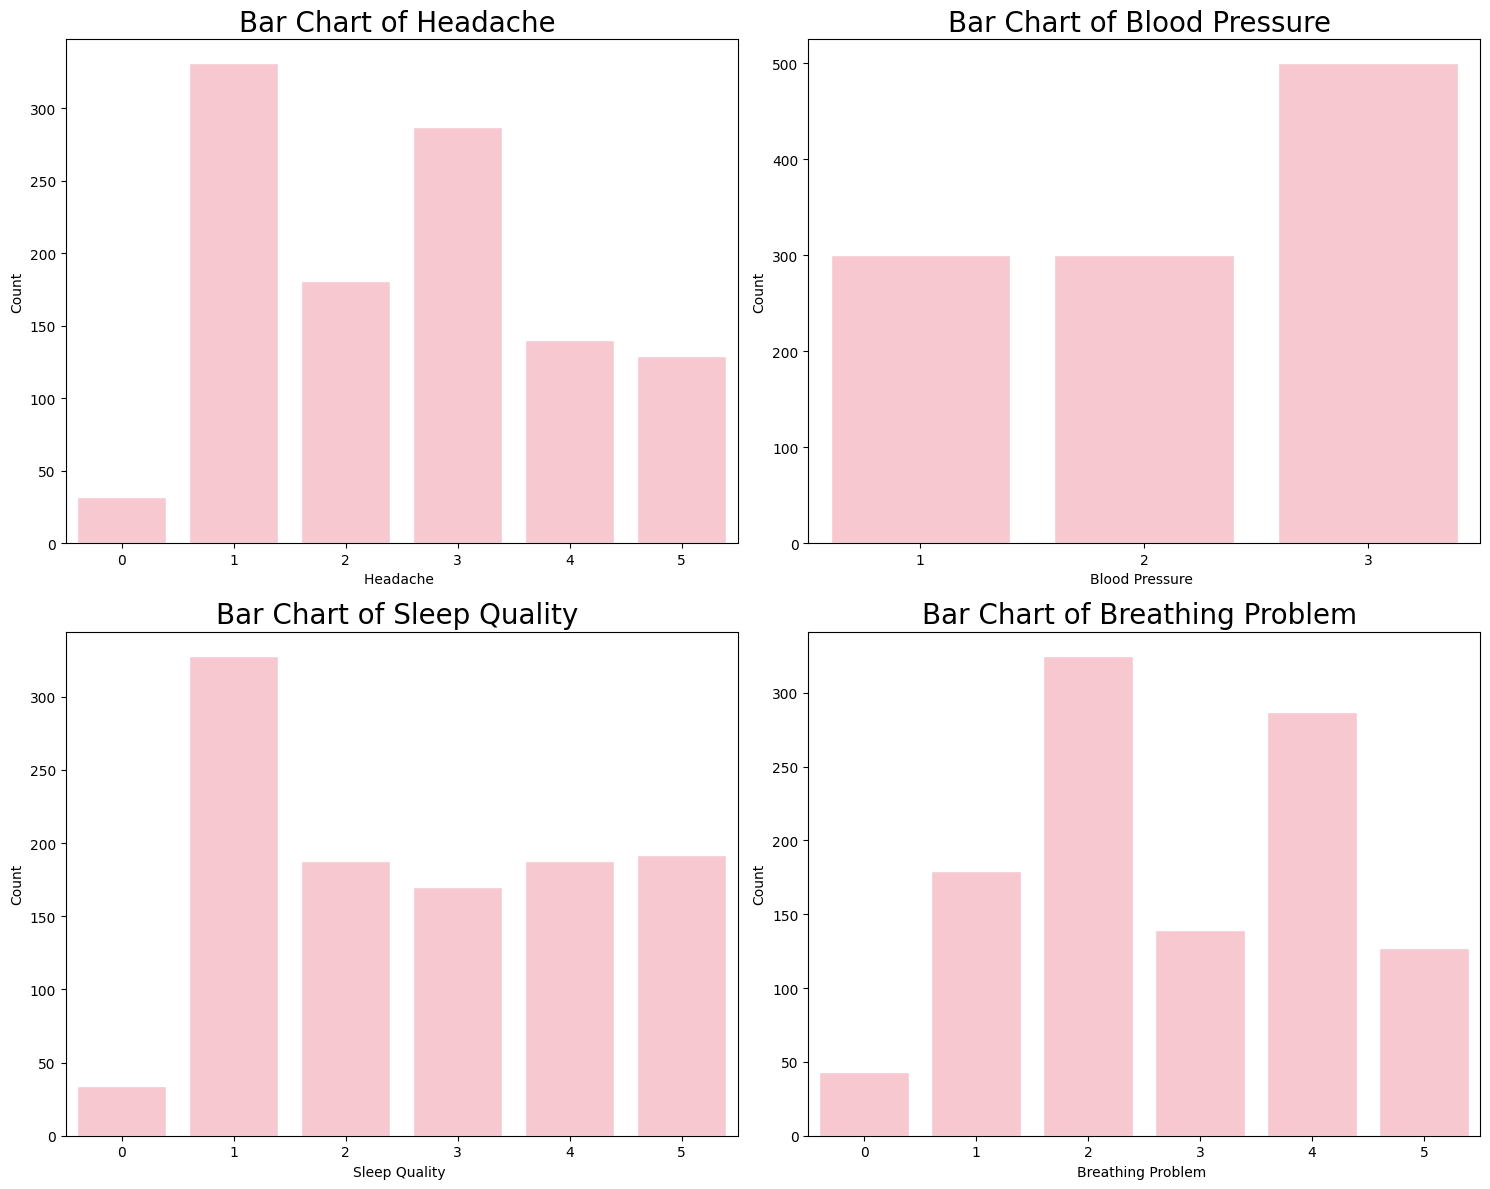

In [ ]:
visualize_factors(physiological_factors,'pink')

## **Machine Learning Algorithms**

### Clustering

In [ ]:
# split into training and testing sets

X = stress.iloc[:, :-1]
y = stress.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.20)

In [ ]:
label_encoder = LabelEncoder()
X_copy=X
for col in X_copy.columns:
    X_copy[col] = label_encoder.fit_transform(X_copy[col])
k = 3
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1, random_state=42)
clusters = km.fit_predict(X_copy)
stress_cluster=stress
stress_cluster['Cluster'] = clusters

stress_cluster_0=stress_cluster[stress_cluster['Cluster']==0]
stress_cluster_1=stress_cluster[stress_cluster['Cluster']==1]
stress_cluster_2=stress_cluster[stress_cluster['Cluster']==2]


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 103, cost: 11265.0
Run 1, iteration: 2/100, moves: 22, cost: 11265.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 164, cost: 12471.0
Run 2, iteration: 2/100, moves: 164, cost: 12139.0
Run 2, iteration: 3/100, moves: 254, cost: 11514.0
Run 2, iteration: 4/100, moves: 181, cost: 11338.0
Run 2, iteration: 5/100, moves: 47, cost: 11296.0
Run 2, iteration: 6/100, moves: 16, cost: 11291.0
Run 2, iteration: 7/100, moves: 1, cost: 11291.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 223, cost: 11289.0
Run 3, iteration: 2/100, moves: 36, cost: 11237.0
Run 3, iteration: 3/100, moves: 29, cost: 11237.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 420, cost: 11280.0
Run 4, iteration: 2/100,

In [ ]:
counter=0
stress_cluster_0=stress_cluster_0.reset_index()
for i in range(len(stress_cluster_0)):
  if stress_cluster_0.at[i,'stress_level']==stress_cluster_0.at[i,'Cluster']:
    counter=counter+1
print(counter/len(stress_cluster_0))

0.9002849002849003


In [ ]:
stress_cluster_1['stress_level'].value_counts() #80

2    340
0     49
1     33
Name: stress_level, dtype: int64

In [ ]:
stress_cluster_2['stress_level'].value_counts() #95

1    313
0      8
2      6
Name: stress_level, dtype: int64

In [ ]:
print("stress_cluster_0\n",stress_cluster_0['stress_level'].value_counts())
print("stress_cluster_1\n",stress_cluster_1['stress_level'].value_counts())
print("stress_cluster_2\n",stress_cluster_2['stress_level'].value_counts())

stress_cluster_0
 0    316
2     23
1     12
Name: stress_level, dtype: int64
stress_cluster_1
 2    340
0     49
1     33
Name: stress_level, dtype: int64
stress_cluster_2
 1    313
0      8
2      6
Name: stress_level, dtype: int64


### Decision Tree Classifier

In [ ]:
dt_classifier = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)
y_pred = best_dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Test Accuracy: 0.8454545454545455


### Random Forest Classifier

In [ ]:
# Random forest ans cross validation
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [20, 50],
    'min_samples_leaf': [2, 4],
    'max_features': ['auto', 'log2']
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)
y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers a

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 50}
Test Accuracy: 0.8954545454545455


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


Average Feature Importances:
blood_pressure: 0.13576142210222086
sleep_quality: 0.08601443869948898
extracurricular_activities: 0.0791703017050548
safety: 0.07068101525604381
bullying: 0.06967916184098169
teacher_student_relationship: 0.05825087885257453
social_support: 0.0578631464095186
basic_needs: 0.05513389669483706
depression: 0.05462452063061327
future_career_concerns: 0.05396218833327162
anxiety_level: 0.05192402615881346
self_esteem: 0.04611890984704159
academic_performance: 0.03822856903650574
headache: 0.035823372081442664
peer_pressure: 0.03536730864768532
noise_level: 0.024851518547633577
study_load: 0.01672074375484699
living_conditions: 0.012535581240332827
breathing_problem: 0.011940236165385535
mental_health_history: 0.005348763995707185
Selected Features with Importance > 0.05:
['blood_pressure', 'sleep_quality', 'extracurricular_activities', 'safety', 'bullying', 'teacher_student_relationship', 'social_support', 'basic_needs', 'depression', 'future_career_concerns', 

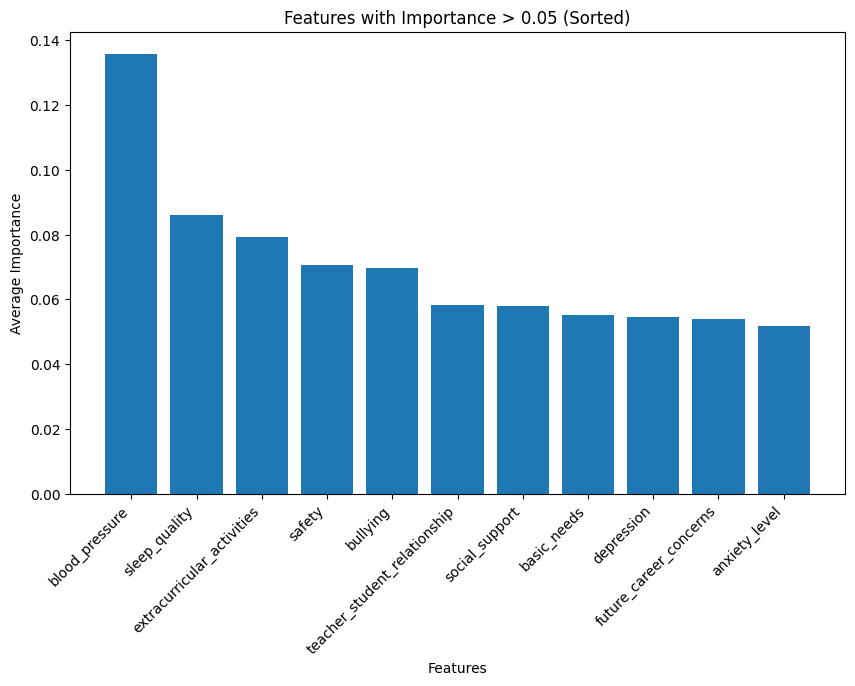

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train, and X are defined
all_feature_importances = []

for _ in range(20):
    best_rf_classifier = RandomForestClassifier()
    best_rf_classifier.fit(X_train, y_train)

    feature_importances = best_rf_classifier.feature_importances_
    all_feature_importances.append(feature_importances)

average_feature_importance = np.mean(all_feature_importances, axis=0)

selected_features = []
print("Average Feature Importances:")
for feature_name, importance in sorted(zip(X.columns, average_feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{feature_name}: {importance}")

    if importance > 0.05:
        selected_features.append(feature_name)

X_selected = X[selected_features]
print("Selected Features with Importance > 0.05:")
print(selected_features)

# Plotting features with importance > 0.05
sorted_indices = np.argsort(average_feature_importance)[::-1]
sorted_features = np.array(X.columns)[sorted_indices]
sorted_importances = average_feature_importance[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features[sorted_importances > 0.05], sorted_importances[sorted_importances > 0.05])
plt.xlabel('Features')
plt.ylabel('Average Importance')
plt.title('Features with Importance > 0.05 (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
average_feature_importance

array([0.05093106, 0.0493306 , 0.00544903, 0.05863505, 0.03272805,
       0.14015881, 0.08059139, 0.01192252, 0.02450351, 0.01198378,
       0.06867377, 0.05296454, 0.0345225 , 0.01537938, 0.06702009,
       0.05268555, 0.05427811, 0.03603463, 0.08178243, 0.07042519])

Text(0.5, 1.0, 'Feature Importance Bar Graph')

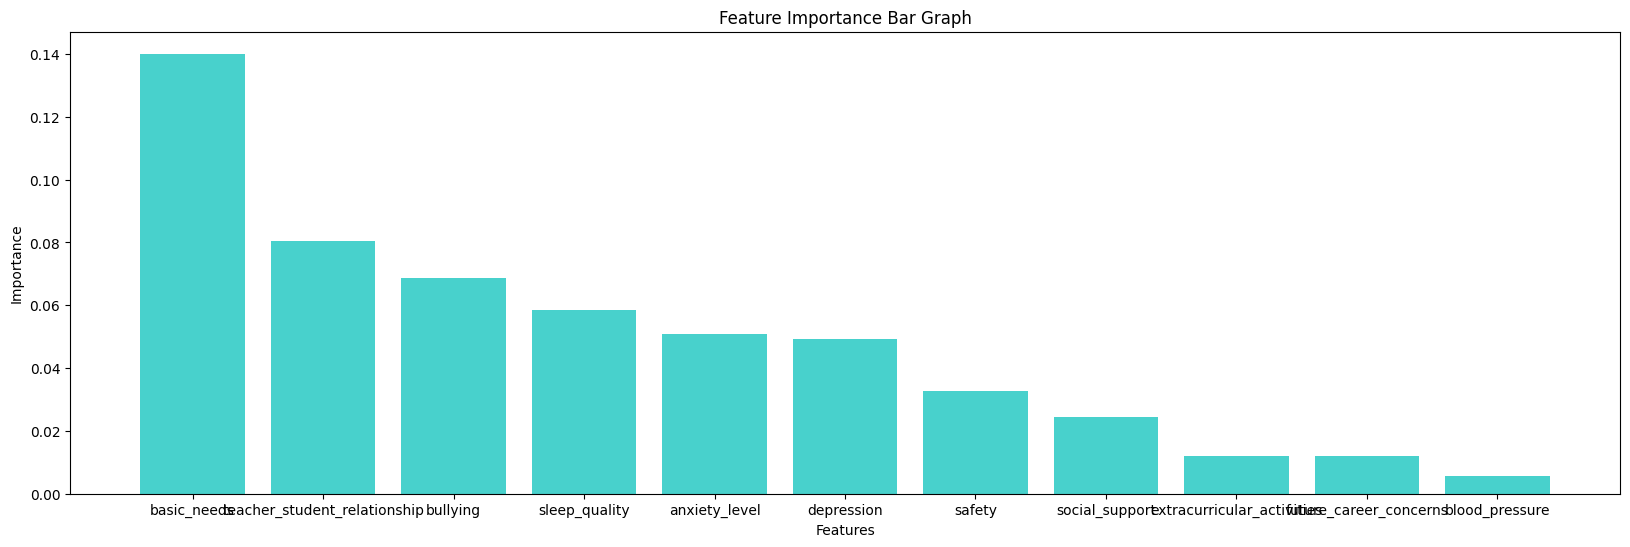

In [ ]:
nums=list(average_feature_importance)
names=list(X_selected)
sorted_data = sorted(zip(names, nums), key=lambda x: x[1], reverse=True)
sorted_names, sorted_nums = zip(*sorted_data)
fig, ax = plt.subplots(figsize=(20, 6))

plt.bar(sorted_names, sorted_nums, color='mediumturquoise')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Bar Graph')

### SVM

In [ ]:
svm_model = SVC()

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly']}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Accuracy on the test set: 0.8863636363636364


### AdaBoost

In [ ]:
adaboost = AdaBoostClassifier(random_state=42)
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
grid_search_ab = GridSearchCV(adaboost, param_grid=param_grid_ab, cv=3, scoring='accuracy')
grid_search_ab.fit(X_train, y_train)

best_params_ab = grid_search_ab.best_params_
best_adaboost = AdaBoostClassifier(random_state=42, **best_params_ab)
best_adaboost.fit(X_train, y_train)

y_pred_ab = best_adaboost.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f"AdaBoost Accuracy: {accuracy_ab}")
print(f"Adaboost Best Parameters: {best_params_ab}")

AdaBoost Accuracy: 0.8772727272727273
Adaboost Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}


### Bagging

In [ ]:
base_classifier = best_rf_classifier
bagging_classifier = BaggingClassifier(base_classifier, random_state=42)
bagging_classifier.fit(X_train, y_train)

y_pred_bagging = bagging_classifier.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers a

Bagging Accuracy: 0.8863636363636364


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


### Sample tree plot

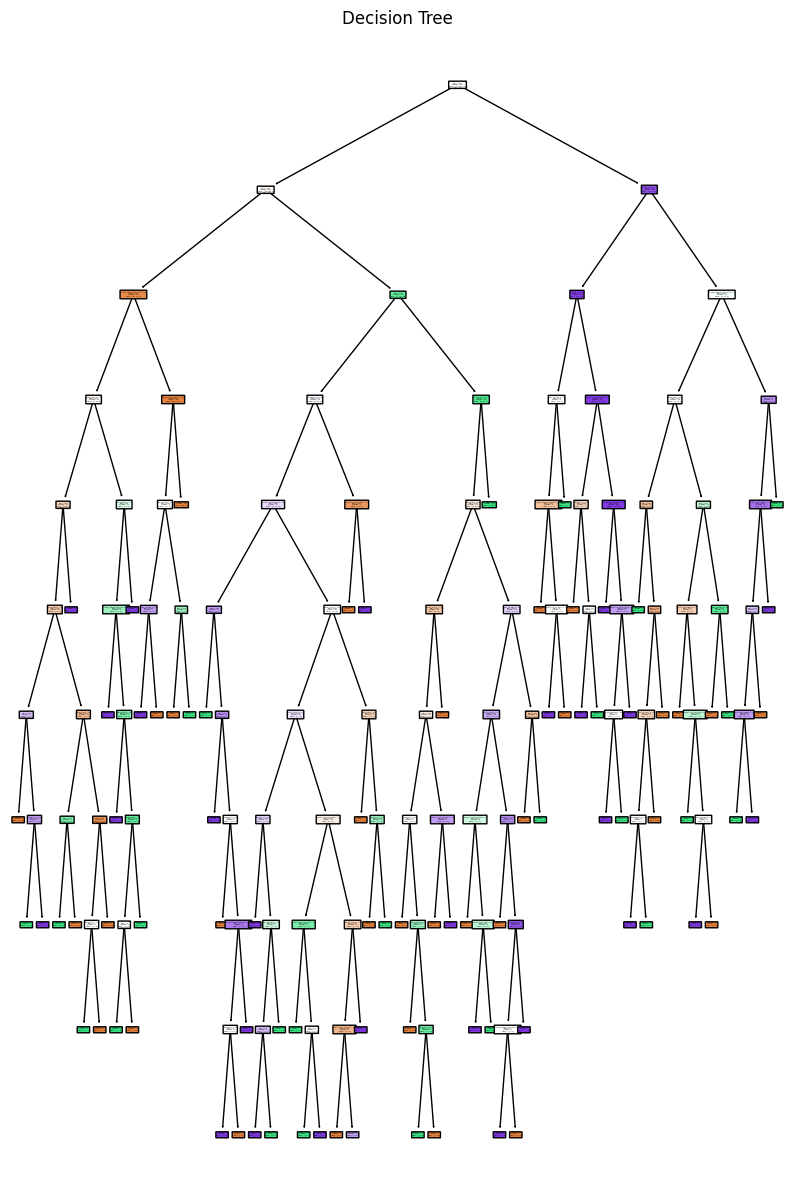

In [ ]:
plt.figure(figsize=(10,15))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.title('Decision Tree')
plt.savefig('decision_tree_1_plot.png', dpi=300)
plt.show()

## **Performance Measurement**

## Voting

In [ ]:
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', best_rf_classifier),
        ('ab', best_adaboost),
        ('dt', best_dt_classifier),
        ('svm', best_svm_model),
        ('bag', bagging_classifier)
    ],
    voting='hard'
)
voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Hard Voting Accuracy: {accuracy_voting}")

In [ ]:
# new X_train and X_test sets if we use variables with importance score > 0.05 in rf classifier

new_X_vars = []

for i in range(len(rf_list)):
  if rf_list[i][1] > 0.05:
    new_X_vars.append(rf_list[i][0])

X_sub_train = X_train[new_X_vars]
X_sub_test = X_test[new_X_vars]

In [ ]:
results_dict={}

best_dt_classifier.fit(X_sub_train, y_train)
y_pred = best_dt_classifier.predict(X_sub_test)
accuracy_best_dt_classifier = accuracy_score(y_test, y_pred)
results_dict['best_dt_classifier']=accuracy_best_dt_classifier

best_rf_classifier.fit(X_sub_train, y_train)
y_pred = best_rf_classifier.predict(X_sub_test)
accuracy_best_rf_classifier = accuracy_score(y_test, y_pred)
results_dict['best_rf_classifier']=accuracy_best_rf_classifier

best_svm_model.fit(X_sub_train, y_train)
y_pred = best_svm_model.predict(X_sub_test)
accuracy_best_svm_model = accuracy_score(y_test, y_pred)
results_dict['best_svm_model']=accuracy_best_svm_model

best_adaboost.fit(X_sub_train, y_train)
y_pred = best_adaboost.predict(X_sub_test)
accuracy_best_adaboost = accuracy_score(y_test, y_pred)
results_dict['best_adaboost']=accuracy_best_adaboost

bagging_classifier.fit(X_sub_train, y_train)
y_pred = bagging_classifier.predict(X_sub_test)
accuracy_best_bagging_classifier = accuracy_score(y_test, y_pred)
results_dict['bagging_classifier']=accuracy_best_bagging_classifier

voting_classifier.fit(X_sub_train, y_train)
y_pred = voting_classifier.predict(X_sub_test)
accuracy_voting_classifier = accuracy_score(y_test, y_pred)
results_dict['voting_classifier']=accuracy_voting_classifier

In [ ]:
model_accuracy_df = pd.DataFrame({'Category':list(results_dict.keys()),'Value':list(results_dict.values())})
model_accuracy_df.sort_values('Value', ascending=False, inplace=True)

plt.figure(figsize=(12,10))
plt.bar(model_accuracy_df['Category'], model_accuracy_df['Value'], color='skyblue')
plt.ylim(0.7, 0.9)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

In [ ]:
model_accuracy_df

## **Deployment and Testing**

In [ ]:
def get_input():
  vars=X_sub_train.columns
  vals=[]
  for i in range(len(vars)):
    vals.append(int(input('Enter a number for {}: '.format(str(vars[i])))))
  return vals


In [ ]:
def predict_new_obs(data_test):
  test_case_df = pd.DataFrame([data_test])
  #print(test_case_df)
  y_pred = best_rf_classifier.predict(test_case_df)
  print(y_pred)

In [ ]:
user_input=get_input()
print(user_input)
predict_new_obs(user_input)

Enter a number for extracurricular_activities: 5
Enter a number for blood_pressure: 1
Enter a number for safety: 5
Enter a number for bullying: 1
Enter a number for sleep_quality: 5
Enter a number for social_support: 5
Enter a number for teacher_student_relationship: 5
Enter a number for anxiety_level: 1
Enter a number for basic_needs: 1
Enter a number for depression: 1
[5, 1, 5, 1, 5, 5, 5, 1, 1, 1]
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


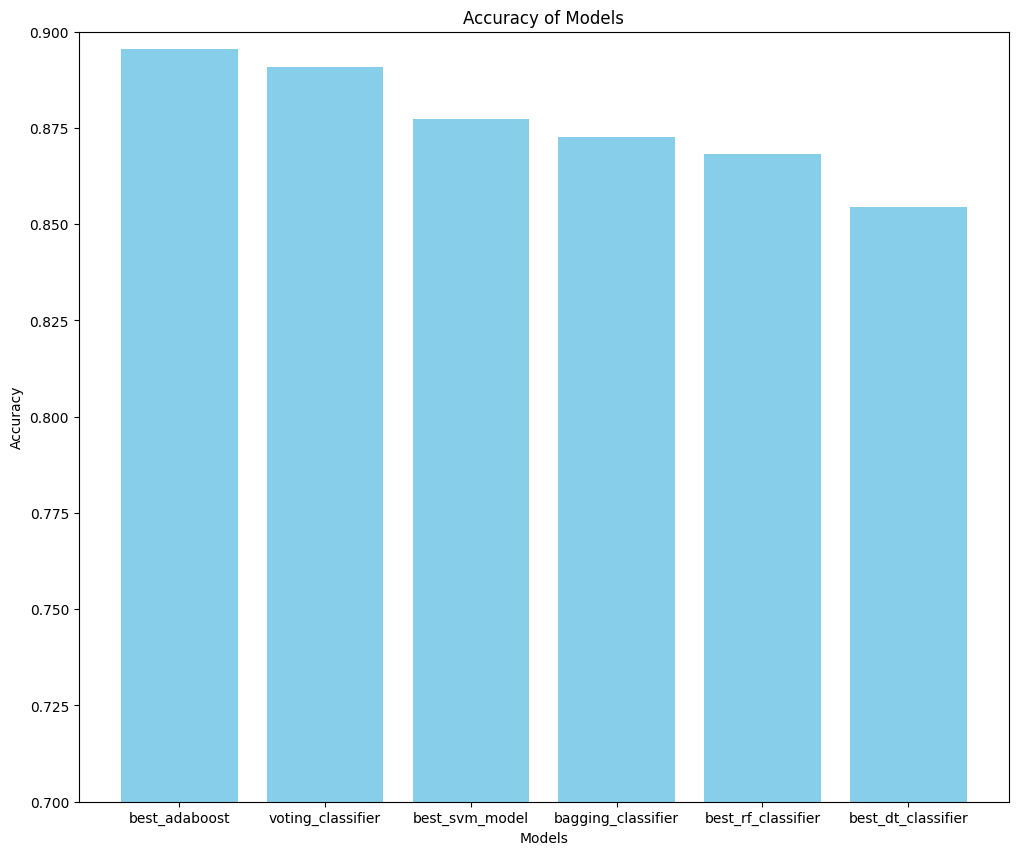

In [ ]:
model_accuracy_df = pd.DataFrame({'Category':list(results_dict.keys()),'Value':list(results_dict.values())})
model_accuracy_df.sort_values('Value', ascending=False, inplace=True)

plt.figure(figsize=(12,10))
plt.bar(model_accuracy_df['Category'], model_accuracy_df['Value'], color='skyblue')
plt.ylim(0.7, 0.9)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()